In [147]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.model_selection import validation_curve, learning_curve


In [65]:
train_df = '../../final_project/train_users_2.csv'


airbnb_df = pd.read_csv(train_df)

In [66]:
airbnb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


# Cleaning the data

In [67]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
airbnb_df  = airbnb_df.drop(['date_account_created','timestamp_first_active', 'id'], axis=1)


In [68]:
airbnb_df.head()

,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [69]:
airbnb_df.gender.replace('-unknown-', np.nan, inplace=True)


In [70]:
airbnb_df.head()

,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [71]:
#removes nan values and non booked
airbnb_df = airbnb_df.dropna()


In [72]:
#get value counts of each targe
airbnb_df['country_destination'].value_counts()

US       39737
other     6213
FR        3062
IT        1669
GB        1477
ES        1428
CA         873
DE         728
NL         499
AU         371
PT         135
Name: country_destination, dtype: int64

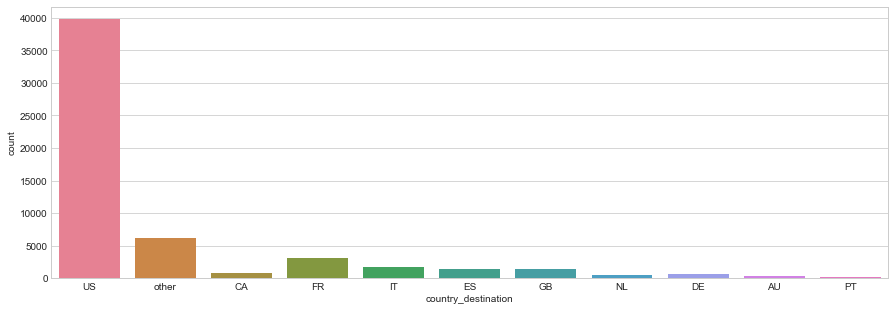

In [73]:
# country_destination

#airbnb_df['booked'] = (airbnb_df['country_destination'] != 'NDF').astype(int)


# Plot the frequency for every country_destination value
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=airbnb_df, palette="husl", ax=axis1)

In [64]:
airbnb_df.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Year
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2012
6,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010
7,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,2010
8,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010


In [74]:
# date_first_booking

def get_year(date):
    if date == date: 
        return int(str(date)[:4])
    return date

def get_month(date):
    if date == date: 
        return int(str(date)[5:7])
    return date

# Create Year and Month columns
airbnb_df['Year']  = airbnb_df['date_first_booking'].apply(get_year)
airbnb_df['Month'] = airbnb_df['date_first_booking'].apply(get_month)


# fill NaN
airbnb_df['Year'].fillna(airbnb_df['Year'].median(), inplace=True)
airbnb_df['Month'].fillna(airbnb_df['Month'].median(), inplace=True)

# convert type to integer
airbnb_df[['Year', 'Month']] = airbnb_df[['Year', 'Month']].astype(int)


# drop columns
airbnb_df.drop(['date_first_booking','Month'], axis=1, inplace=True)

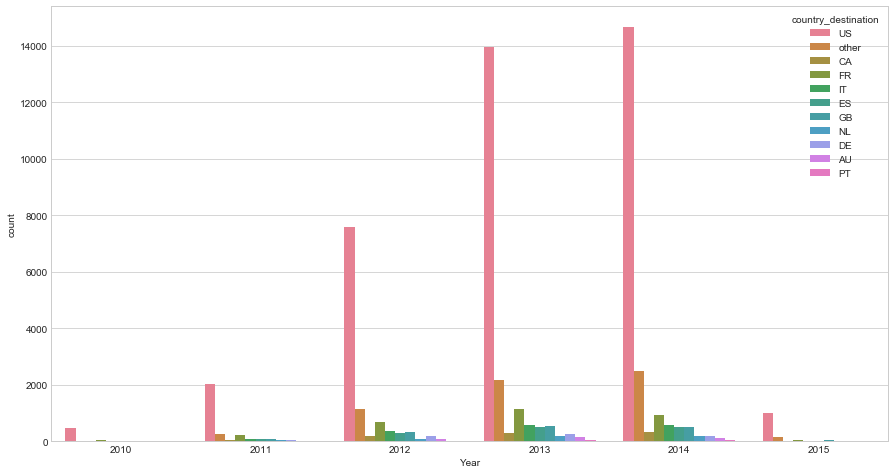

In [85]:
# Plot 
fig, (axis1) = plt.subplots(1,1,sharex=True,figsize=(15,8))

# frequency of country_destination for every year
sns.countplot(x="Year",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)

In [183]:
airbnb_df.groupby(['Year'])['country_destination'].value_counts()

Year  country_destination
2010  US                       470
      FR                        56
      other                     24
      ES                        19
      CA                        12
      IT                        12
      DE                         9
      GB                         8
      NL                         5
      AU                         3
2011  US                      2010
      other                    247
      FR                       203
      ES                        84
      GB                        81
      IT                        77
      CA                        57
      DE                        46
      NL                        32
      AU                        18
      PT                        11
2012  US                      7458
      other                   1122
      FR                       663
      IT                       371
      GB                       335
      ES                       302
      CA                     

In [82]:
airbnb_df['gender'].value_counts()

FEMALE    29863
MALE      26168
OTHER       161
Name: gender, dtype: int64

In [99]:
airbnb_df.groupby(['gender'])['country_destination'].value_counts()

gender  country_destination
FEMALE  US                     21224
        other                   2937
        FR                      1807
        IT                      1017
        GB                       826
        ES                       800
        CA                       424
        DE                       329
        NL                       233
        AU                       195
        PT                        71
MALE    US                     18410
        other                   3256
        FR                      1242
        GB                       648
        IT                       647
        ES                       624
        CA                       444
        DE                       396
        NL                       263
        AU                       175
        PT                        63
OTHER   US                       103
        other                     20
        FR                        13
        CA                         5
        IT

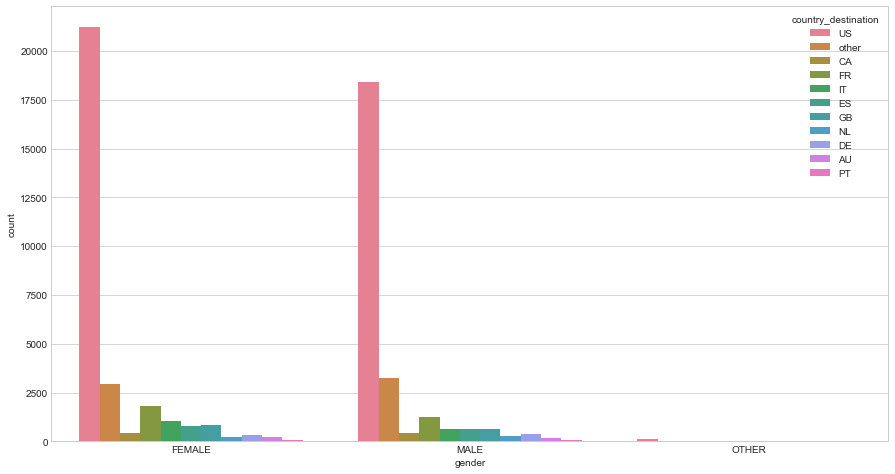

In [86]:
#gender plot
fig, (axis1) = plt.subplots(1,1,sharex=True,figsize=(15,8))

sns.countplot(x="gender",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)



In [ ]:


# Map gender values to 1s and 0s
#airbnb_df["gender"] = airbnb_df["gender"].map({"FEMALE": 1, "MALE": 0})

# drop columns
#airbnb_df.drop(['gender'], axis=1,inplace=True)


In [101]:
airbnb_df['gender'] = pd.factorize(airbnb_df.gender)[0]


In [133]:
airbnb_df.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Year
2,0,56,1,1,1,1,1,6,2,6,12,US,2010
3,0,42,0,0,1,1,1,6,2,3,11,other,2012
6,0,46,1,0,1,0,0,6,2,3,26,US,2010
7,0,47,1,0,1,1,1,3,2,3,26,US,2010
8,0,50,1,0,1,0,0,6,2,3,26,US,2010


In [104]:
#age discrepancies
airbnb_df.age.describe()

count    56192.000000
mean        48.532033
std        153.592744
min          2.000000
25%         28.000000
50%         33.000000
75%         41.000000
max       2014.000000
Name: age, dtype: float64

In [103]:
airbnb_df[airbnb_df.age > 122]['age'].describe()


count     342.000000
mean     1999.318713
std       143.706693
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [111]:
#replace ages too low or too high with nan values
airbnb_df.loc[airbnb_df.age > 95, 'age'] = np.nan
airbnb_df.loc[airbnb_df.age < 18, 'age'] = np.nan

In [112]:
#drop null ages 
airbnb_df = airbnb_df.dropna()

In [117]:
airbnb_df["age"] = (airbnb_df["age"]).astype(int)

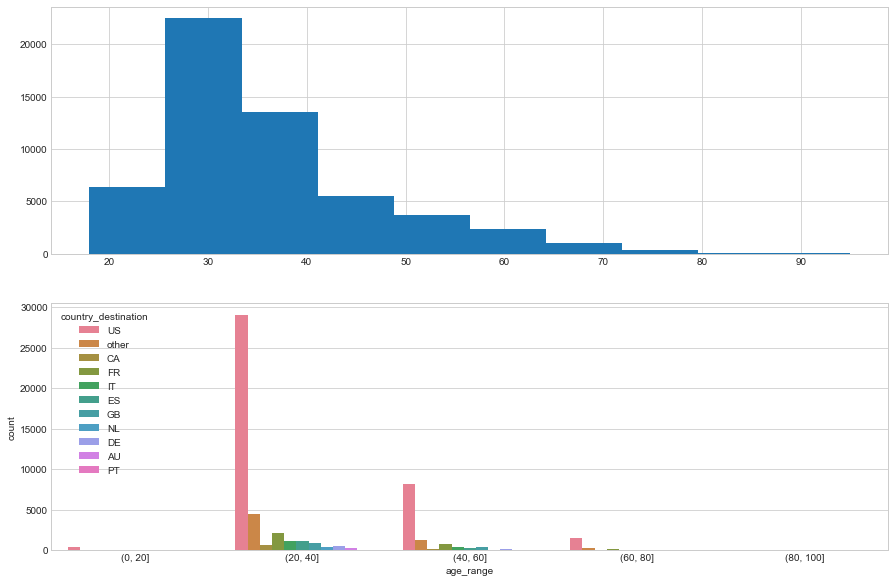

In [113]:
# Plot
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(15,10))

# frequency for age values(in case there was a booking)
airbnb_df['age'][airbnb_df['country_destination'] != 'NDF'].hist(ax=axis1)

# cut age values into ranges 
airbnb_df['age_range'] = pd.cut(airbnb_df["age"], [0, 20, 40, 60, 80, 100])

# frequency of country_destination for every age range
sns.countplot(x="age_range",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis2)



In [121]:
airbnb_df.drop(['age_range'], axis=1, inplace=True)

In [122]:
airbnb_df.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Year
2,0,56,1,1,1,1,1,untracked,Web,Windows Desktop,IE,US,2010
3,0,42,0,0,1,1,1,untracked,Web,Mac Desktop,Firefox,other,2012
6,0,46,1,0,1,0,0,untracked,Web,Mac Desktop,Safari,US,2010
7,0,47,1,0,1,1,1,omg,Web,Mac Desktop,Safari,US,2010
8,0,50,1,0,1,0,0,untracked,Web,Mac Desktop,Safari,US,2010


In [125]:
# first_affiliate_tracked

# fill NaN values randomly
count_first_affiliate = 7    # len(np.unique(airbnb_df["first_affiliate_tracked"].value_counts()))

count_nan_department_airbnb = airbnb_df["first_affiliate_tracked"].isnull().sum()

rand_1 = np.random.randint(0, count_first_affiliate, size = count_nan_department_airbnb)

range_departments_airbnb = airbnb_df['first_affiliate_tracked'].value_counts().index

airbnb_df["first_affiliate_tracked"][airbnb_df["first_affiliate_tracked"] != airbnb_df["first_affiliate_tracked"]] = range_departments_airbnb[rand_1]

# drop columns
# airbnb_df.drop(['first_affiliate_tracked'], axis=1,inplace=True)
# test_df.drop(['first_affiliate_tracked'], axis=1,inplace=True)

C:\Users\kfarkas\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [119]:
# signup_method
airbnb_df["signup_method"] = (airbnb_df["signup_method"] == "basic").astype(int)

# signup_flow
airbnb_df["signup_flow"] = (airbnb_df["signup_flow"] == 3).astype(int)

# language
airbnb_df["language"] = (airbnb_df["language"] == 'en').astype(int)

# affiliate_channel
airbnb_df["affiliate_channel"] = (airbnb_df["affiliate_channel"] == 'direct').astype(int)

# affiliate_provider
airbnb_df["affiliate_provider"] = (airbnb_df["affiliate_provider"] == 'direct').astype(int)


In [157]:
airbnb_df.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Year
2,0,56,1,1,1,1,1,6,2,6,12,US,2010
3,0,42,0,0,1,1,1,6,2,3,11,other,2012
6,0,46,1,0,1,0,0,6,2,3,26,US,2010
7,0,47,1,0,1,1,1,3,2,3,26,US,2010
8,0,50,1,0,1,0,0,6,2,3,26,US,2010


In [127]:
# There are some columns with non-numerical values(i.e. dtype='object'),
# So, We will create a corresponding unique numerical value for each non-numerical value in a column of training and testing set.

from sklearn import preprocessing

for f in airbnb_df.columns:
    if f == "country_destination" or f == "id": continue
    if airbnb_df[f].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(airbnb_df[f].values)))
        airbnb_df[f] = lbl.transform(list(airbnb_df[f].values))


# Running the models: Decision Tree and Random Forrests

In [128]:
X = airbnb_df.drop(['country_destination'],axis=1)
y = airbnb_df["country_destination"]


In [129]:
# modify country_destination to numerical values

country_num_dic = {'NDF': 0, 'US': 1, 'other': 2, 'FR': 3, 'IT': 4, 'GB': 5, 'ES': 6, 'CA': 7, 'DE': 8, 'NL': 9, 'AU': 10, 'PT': 11}
num_country_dic = {y:x for x,y in country_num_dic.items()}

y   = y.map(country_num_dic)

In [130]:
from sklearn.cross_validation import train_test_split, cross_val_score


In [138]:

# define training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)


In [139]:
#fit default model on the training set
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#Evaluate model on training data
model.score(X_train, y_train)

0.81778323817783238

In [140]:
model.score(X_test, y_test)

0.61034831623066921

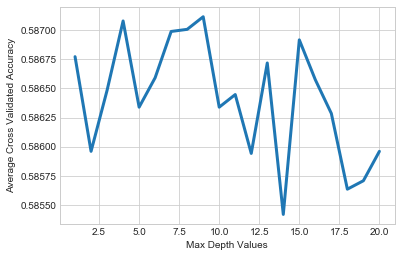

In [151]:

depths = range(1,21)
cv_scores = []

for depth in depths:
    cv = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5, scoring = "accuracy")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)
    
plt.plot(depths, cv_scores, linewidth = 3)
plt.xlabel("Max Depth Values")
plt.ylabel("Average Cross Validated Accuracy");

In [144]:
null_acc = pd.value_counts(y_test, normalize = True).max()
null_acc

0.70320855614973266

In [145]:
y.value_counts(normalize = True)

1     0.707294
2     0.110372
3     0.054635
4     0.029612
5     0.026143
6     0.025475
7     0.015646
8     0.012936
9     0.008853
10    0.006613
11    0.002421
Name: country_destination, dtype: float64

In [152]:
# Create range of values for parameter
depth_range = np.arange(1, 25)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y, param_name="max_depth", param_range= depth_range, 
                                            cv = 5, scoring = "accuracy")

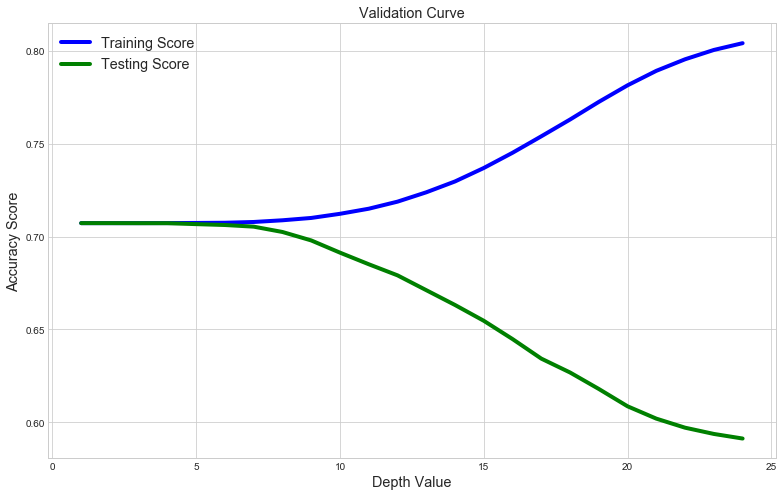

In [153]:
# Calculate mean for training set scores
train_mean = np.mean(train_scores, axis = 1)

# Calculate mean for test set scores
test_mean = np.mean(test_scores, axis = 1)


#Set size
plt.figure(figsize=(11, 7))

# Plot mean accuracy scores for training and test sets
plt.plot(depth_range, train_mean, label = "Training Score", color = "blue", linewidth = 4)
plt.plot(depth_range, test_mean, label = "Testing Score", color = "green", linewidth = 4)

# Create plot

plt.title("Validation Curve", fontsize = "x-large")
plt.xlabel("Depth Value", fontsize = "x-large")
plt.ylabel("Accuracy Score",  fontsize = "x-large")
plt.tight_layout()
plt.legend(loc="best", fontsize = "x-large")

plt.show()

In [154]:
#Assign best depth value to depth

depth = 7

In [155]:
#Create values for train_sizes, train_scores, and test_scores
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth = depth), X, y,
                                                       cv = 5, scoring = "accuracy", train_sizes = np.linspace(0.01,1,50))

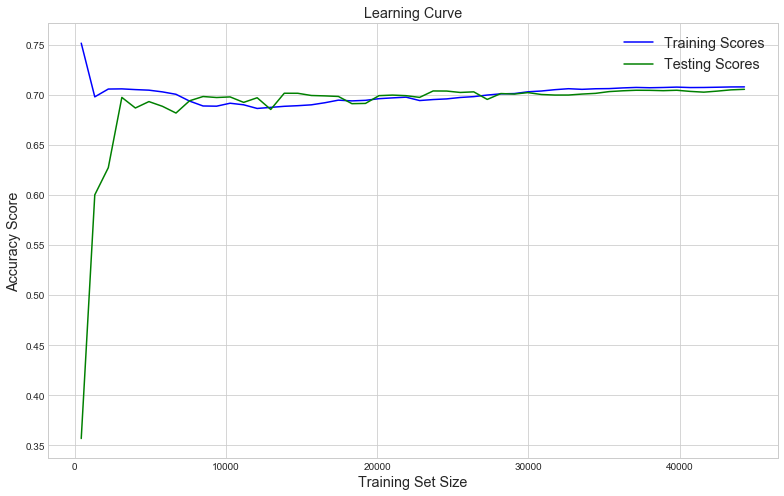

In [156]:
# Create means of training set scores
train_mean = np.mean(train_scores, axis = 1)

# Create means of test set scores
test_mean = np.mean(test_scores, axis = 1)

#Set size
plt.figure(figsize=(11, 7))

# Draw lines
plt.plot(train_sizes, train_mean, color = "blue", label = "Training Scores")
plt.plot(train_sizes, test_mean, color = "green", label = "Testing Scores")

# Create plot

plt.title("Learning Curve", fontsize = "x-large")
plt.xlabel("Training Set Size", fontsize = "x-large")
plt.ylabel("Accuracy Score",  fontsize = "x-large")
plt.tight_layout()
plt.legend(loc="best", fontsize = "x-large")

plt.show()

In [176]:
dt = DecisionTreeClassifier(max_depth = 7)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [177]:
dt.feature_importances_

array([ 0.09776762,  0.36196423,  0.01706836,  0.01459822,  0.01824717,
        0.00862097,  0.0030836 ,  0.02250962,  0.08661207,  0.11863474,
        0.08217854,  0.16871486])

In [178]:
fi = pd.DataFrame(list(zip(X.columns, dt.feature_importances_)), columns = ["feature", "importance_score"])
fi

,feature,importance_score
0,gender,0.097768
1,age,0.361964
2,signup_method,0.017068
3,signup_flow,0.014598
4,language,0.018247
5,affiliate_channel,0.008621
6,affiliate_provider,0.003084
7,first_affiliate_tracked,0.022510
8,signup_app,0.086612
9,first_device_type,0.118635


In [179]:
fi.sort_values(by = "importance_score", ascending = False)

,feature,importance_score
1,age,0.361964
11,Year,0.168715
9,first_device_type,0.118635
0,gender,0.097768
8,signup_app,0.086612
10,first_browser,0.082179
7,first_affiliate_tracked,0.022510
4,language,0.018247
2,signup_method,0.017068
3,signup_flow,0.014598


In [163]:
rf = RandomForestClassifier(n_estimators = 50)

#Fit model
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [164]:
# list of values to try for n_estimators
estimator_range = range(10, 210, 10)

# list to store the average accuracy score for each value of n_estimators
acc_scores = []

# use 5-fold cross-validation with each value of n_estimators. Will take a while.

for estimator in estimator_range:
    rfclass = RandomForestClassifier(n_estimators=estimator, random_state=1)
    scores = cross_val_score(rfclass, X, y, cv=5, scoring='accuracy')
    acc_scores.append(np.mean(scores))

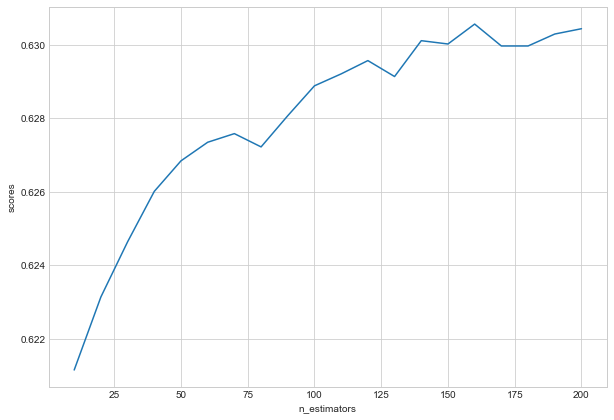

In [165]:
# plot n_estimators (x-axis) versus scores (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(estimator_range, acc_scores)
plt.xlabel('n_estimators')
plt.ylabel('scores');

In [166]:
sorted(zip(acc_scores, estimator_range), reverse=True)[0]

(0.6305650040931724, 160)

In [167]:
rfclass = RandomForestClassifier()

In [169]:
feature_cols = X.columns

In [173]:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
acc_scores = []

# use 5-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfclass = RandomForestClassifier(n_estimators=160, max_features=feature, random_state=1)
    scores = cross_val_score(rfclass, X, y, cv=5, scoring='accuracy')
    acc_scores.append(np.mean(scores))

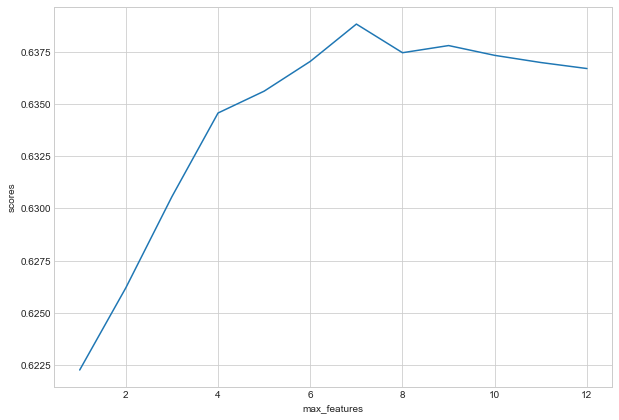

In [174]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(feature_range, acc_scores)
plt.xlabel('max_features')
plt.ylabel('scores');

In [175]:
sorted(zip(acc_scores, feature_range), reverse= True)[0]

(0.63883906904848409, 7)

In [180]:
# max_features=7 is best and n_estimators=160 is sufficiently large
rclass = RandomForestClassifier(n_estimators=160, 
                              max_features=7,
                              oob_score=True,
                              random_state=1)
rfclass.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [181]:
# compute feature importances
pd.DataFrame({'feature':feature_cols,
              'importance':rfclass.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
1,age,0.308749
10,first_browser,0.132102
7,first_affiliate_tracked,0.117893
11,Year,0.092141
2,signup_method,0.083903
9,first_device_type,0.081535
5,affiliate_channel,0.039433
6,affiliate_provider,0.039402
0,gender,0.030499
8,signup_app,0.027708
